In [0]:
import os

In [0]:
# 今回使用するレポジトリをGoogle Colabの環境にクローン
# !git clone https://github.com/s0yamazaki/WallClassification.git
!git clone https://github.com/u110/WallClassification

Cloning into 'WallClassification'...
remote: Counting objects: 31446, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 31446 (delta 4), reused 10 (delta 4), pack-reused 31436
Receiving objects: 100% (31446/31446), 331.75 MiB | 36.82 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [0]:
# メインスクリプトの格納ディレクトリに移動
os.chdir('WallClassification')
!ls

classes_extractor.py  googleImageDownloader.json  resize.py
continue_fit.py       model.py			  semi-teching.py
crop.py		      resized_cleaned		  WallClassification.ipynb
erase_duplicates.py   resized_val


In [0]:
!git fetch --all --prune

Fetching origin


In [0]:
!git checkout -b change_models origin/change_models

Branch change_models set up to track remote branch change_models from origin.
Switched to a new branch 'change_models'


In [0]:
!git pull 

Already up-to-date.


In [0]:
!git branch -vv

* change_models a449d38e [origin/change_models] fix typo
  master        e9f0c2a8 [origin/master] Merge remote-tracking branch 'upstream/master'


In [0]:
# メインスクリプトである`model.py`の使用方法を表示
!python model.py -h

Using TensorFlow backend.
usage: model.py [-h] [-t TRAIN_DIR] [-v VALIDATION_DIR] [-b BASE_MODEL]
                model_name

positional arguments:
  model_name            保存するモデルファイルの名前、兼tensorBoardのログディレクトリ名

optional arguments:
  -h, --help            show this help message and exit
  -t TRAIN_DIR, --train_dir TRAIN_DIR
                        トレーニングデータセットが入っているディレクトリ
  -v VALIDATION_DIR, --validation_dir VALIDATION_DIR
                        バリデーションデータセットが入っているディレクトリ
  -b BASE_MODEL, --base_model BASE_MODEL
                        転移学習モデル


In [0]:
# Makefileの中身を表示
!cat Makefile

model-name:=test-model
base-model-name:=vgg16

model:
	python model.py $(model-name) -b $(base-model-name)

base-models:= \
	vgg16 \
	vgg19 \
	resnet50 \
	inception_v3 \
	mobilenet \
	densenet \
	xception \
	nasnet

models-with-base: $(base-models:%=train-with/%)

train-with/%:
	python model.py $(model-name)_$(@F) -b $(@F)


In [0]:
# スクリプトを実行
!make models-with-base

164/164 [==============================] - 73s 443ms/step - loss: 0.6371 - acc: 0.7245 - val_loss: 1.2359 - val_acc: 0.6353
Epoch 14/30
164/164 [==============================] - 73s 443ms/step - loss: 0.6106 - acc: 0.7432 - val_loss: 1.3901 - val_acc: 0.6118
Epoch 15/30
164/164 [==============================] - 72s 441ms/step - loss: 0.5675 - acc: 0.7548 - val_loss: 1.3635 - val_acc: 0.6275
Epoch 16/30
  4/164 [..............................] - ETA: 46s - loss: 0.4798 - acc: 0.7891

164/164 [==============================] - 72s 442ms/step - loss: 0.5694 - acc: 0.7490 - val_loss: 1.2608 - val_acc: 0.6441
Epoch 17/30
164/164 [==============================] - 73s 443ms/step - loss: 0.5555 - acc: 0.7626 - val_loss: 1.3003 - val_acc: 0.6422
Epoch 18/30
140/164 [========================>.....] - ETA: 9s - loss: 0.5467 - acc: 0.7574

164/164 [==============================] - 72s 440ms/step - loss: 0.5419 - acc: 0.7601 - val_loss: 1.3338 - val_acc: 0.6167
Epoch 19/30
164/164 [==============================] - 73s 444ms/step - loss: 0.5253 - acc: 0.7767 - val_loss: 1.3480 - val_acc: 0.6314
Epoch 20/30
164/164 [==============================] - 72s 439ms/step - loss: 0.5078 - acc: 0.7713 - val_loss: 1.2871 - val_acc: 0.6569
Epoch 21/30
  5/164 [..............................] - ETA: 46s - loss: 0.4371 - acc: 0.7937

164/164 [==============================] - 75s 455ms/step - loss: 0.5404 - acc: 0.7702 - val_loss: 1.3502 - val_acc: 0.6343
Epoch 22/30
164/164 [==============================] - 77s 469ms/step - loss: 0.4692 - acc: 0.7861 - val_loss: 1.2820 - val_acc: 0.6657
Epoch 23/30
144/164 [=========================>....] - ETA: 8s - loss: 0.4952 - acc: 0.7793

164/164 [==============================] - 76s 466ms/step - loss: 0.4947 - acc: 0.7765 - val_loss: 1.4221 - val_acc: 0.6373
Epoch 24/30
164/164 [==============================] - 77s 467ms/step - loss: 0.4410 - acc: 0.8012 - val_loss: 1.4150 - val_acc: 0.6363
Epoch 25/30
164/164 [==============================] - 76s 466ms/step - loss: 0.4135 - acc: 0.8019 - val_loss: 1.3877 - val_acc: 0.6275
Epoch 26/30
  5/164 [..............................] - ETA: 45s - loss: 0.2966 - acc: 0.8688

164/164 [==============================] - 76s 466ms/step - loss: 0.4592 - acc: 0.7949 - val_loss: 1.3831 - val_acc: 0.6304
Epoch 27/30
164/164 [==============================] - 77s 470ms/step - loss: 0.4054 - acc: 0.8074 - val_loss: 1.4403 - val_acc: 0.6392
Epoch 28/30


164/164 [==============================] - 77s 469ms/step - loss: 0.4258 - acc: 0.8076 - val_loss: 1.4295 - val_acc: 0.6451
Epoch 29/30
164/164 [==============================] - 77s 467ms/step - loss: 0.4348 - acc: 0.8061 - val_loss: 1.3949 - val_acc: 0.6431
Epoch 30/30
164/164 [==============================] - 77s 467ms/step - loss: 0.3963 - acc: 0.8242 - val_loss: 1.3944 - val_acc: 0.6431
python model.py test-model_vgg19 -b vgg19
Using TensorFlow backend.
Found 5234 images belonging to 11 classes.
classes: {'ALC板': 0, 'ガラスカーテンウォール': 1, 'ガラスブロック': 2, 'コンクリートブロック': 3, 'コンクリート打ち放し': 4, 'スパンドレル': 5, 'スレート波板張り': 6, 'タイル張り': 7, '吹付タイル': 8, '押出成形セメント板': 9, '石張り': 10}
class weight: {7: 0.38527788001472213, 1: 0.48701963338606125, 3: 0.6000229278917804, 4: 0.8994672624162227, 5: 0.967110125646711, 0: 1.310793889306286, 2: 1.6295143212951433, 9: 2.0687747035573123, 8: 2.44009324009324, 10: 5.4070247933884295, 6: 11.895454545454545}
Found 1020 images belonging to 11 classes.


base_model_cls: <function VGG19 at 0x7f7410efc048>
80142336/80134624 [==============================] - 6s 0us/step
2018-07-30 03:25:23.546514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:897] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-07-30 03:25:23.547086: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1392] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-07-30 03:25:23.547145: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1471] Adding visible gpu devices: 0
2018-07-30 03:25:23.940739: I tensorflow/core/common_runtime/gpu/gpu_device.cc:952] Device interconnect StreamExecutor with strength 1 edge matrix:
2018-07-30 03:25:23.940816: I tensorflow/core/common_runtime/gpu/gpu_device.cc:958]      0 
2018-07-30 03:25:23.940851: I tensorflow/core/common_runtime/g

164/164 [==============================] - 92s 561ms/step - loss: 2.2580 - acc: 0.3697 - val_loss: 1.5762 - val_acc: 0.5627
Epoch 2/30
164/164 [==============================] - 79s 484ms/step - loss: 1.4796 - acc: 0.5026 - val_loss: 1.4013 - val_acc: 0.5725
Epoch 3/30
150/164 [==========================>...] - ETA: 5s - loss: 1.2526 - acc: 0.5510

164/164 [==============================] - 81s 491ms/step - loss: 1.2814 - acc: 0.5506 - val_loss: 1.4371 - val_acc: 0.5382
Epoch 4/30
164/164 [==============================] - 80s 485ms/step - loss: 1.1186 - acc: 0.5743 - val_loss: 1.3046 - val_acc: 0.5931
Epoch 5/30
164/164 [==============================] - 80s 490ms/step - loss: 1.0419 - acc: 0.6043 - val_loss: 1.2242 - val_acc: 0.6147
Epoch 6/30
  5/164 [..............................] - ETA: 53s - loss: 0.9101 - acc: 0.7000

164/164 [==============================] - 81s 491ms/step - loss: 0.9203 - acc: 0.6327 - val_loss: 1.2677 - val_acc: 0.6137
Epoch 7/30
164/164 [==============================] - 81s 492ms/step - loss: 0.8625 - acc: 0.6491 - val_loss: 1.2491 - val_acc: 0.6059
Epoch 8/30
142/164 [========================>.....] - ETA: 9s - loss: 0.8390 - acc: 0.6576

164/164 [==============================] - 80s 490ms/step - loss: 0.8368 - acc: 0.6608 - val_loss: 1.2637 - val_acc: 0.6167
Epoch 9/30
164/164 [==============================] - 80s 490ms/step - loss: 0.7834 - acc: 0.6771 - val_loss: 1.2614 - val_acc: 0.6284
Epoch 10/30
164/164 [==============================] - 81s 491ms/step - loss: 0.7599 - acc: 0.6854 - val_loss: 1.4244 - val_acc: 0.5549
Epoch 11/30
  4/164 [..............................] - ETA: 53s - loss: 0.6906 - acc: 0.6875

164/164 [==============================] - 79s 479ms/step - loss: 0.7385 - acc: 0.6853 - val_loss: 1.2857 - val_acc: 0.6392
Epoch 12/30
164/164 [==============================] - 81s 494ms/step - loss: 0.7201 - acc: 0.7067 - val_loss: 1.4060 - val_acc: 0.5912
Epoch 13/30
140/164 [========================>.....] - ETA: 10s - loss: 0.6641 - acc: 0.7237

164/164 [==============================] - 80s 491ms/step - loss: 0.6552 - acc: 0.7230 - val_loss: 1.3119 - val_acc: 0.6216
Epoch 14/30
164/164 [==============================] - 80s 489ms/step - loss: 0.6501 - acc: 0.7282 - val_loss: 1.3479 - val_acc: 0.6314
Epoch 15/30
164/164 [==============================] - 81s 493ms/step - loss: 0.5938 - acc: 0.7342 - val_loss: 1.3594 - val_acc: 0.6108
Epoch 16/30
  5/164 [..............................] - ETA: 54s - loss: 0.5324 - acc: 0.7875

164/164 [==============================] - 80s 486ms/step - loss: 0.5940 - acc: 0.7447 - val_loss: 1.3042 - val_acc: 0.6294
Epoch 17/30
164/164 [==============================] - 81s 492ms/step - loss: 0.6196 - acc: 0.7324 - val_loss: 1.3333 - val_acc: 0.6284
Epoch 18/30
143/164 [=========================>....] - ETA: 8s - loss: 0.5700 - acc: 0.7512

164/164 [==============================] - 79s 483ms/step - loss: 0.5777 - acc: 0.7490 - val_loss: 1.3217 - val_acc: 0.6480
Epoch 19/30
164/164 [==============================] - 81s 491ms/step - loss: 0.5214 - acc: 0.7645 - val_loss: 1.3197 - val_acc: 0.6176
Epoch 20/30
164/164 [==============================] - 81s 492ms/step - loss: 0.4775 - acc: 0.7813 - val_loss: 1.4265 - val_acc: 0.6343
Epoch 21/30
  4/164 [..............................] - ETA: 55s - loss: 0.4924 - acc: 0.7422

164/164 [==============================] - 81s 492ms/step - loss: 0.4823 - acc: 0.7781 - val_loss: 1.4252 - val_acc: 0.6333
Epoch 22/30
164/164 [==============================] - 81s 492ms/step - loss: 0.4585 - acc: 0.7869 - val_loss: 1.3578 - val_acc: 0.6569
Epoch 23/30
140/164 [========================>.....] - ETA: 10s - loss: 0.4391 - acc: 0.7925

164/164 [==============================] - 80s 487ms/step - loss: 0.4452 - acc: 0.7901 - val_loss: 1.4512 - val_acc: 0.6235
Epoch 24/30
164/164 [==============================] - 81s 492ms/step - loss: 0.4446 - acc: 0.7918 - val_loss: 1.3712 - val_acc: 0.6294
Epoch 25/30
164/164 [==============================] - 81s 494ms/step - loss: 0.4373 - acc: 0.7950 - val_loss: 1.3233 - val_acc: 0.6578
Epoch 26/30
  2/164 [..............................] - ETA: 55s - loss: 0.2312 - acc: 0.8594

164/164 [==============================] - 81s 492ms/step - loss: 0.4375 - acc: 0.7976 - val_loss: 1.3756 - val_acc: 0.6775
Epoch 27/30
164/164 [==============================] - 80s 489ms/step - loss: 0.4090 - acc: 0.8067 - val_loss: 1.4769 - val_acc: 0.6196
Epoch 28/30
140/164 [========================>.....] - ETA: 10s - loss: 0.3788 - acc: 0.8158

164/164 [==============================] - 81s 494ms/step - loss: 0.3799 - acc: 0.8131 - val_loss: 1.4189 - val_acc: 0.6529
Epoch 29/30
164/164 [==============================] - 80s 488ms/step - loss: 0.3876 - acc: 0.8132 - val_loss: 1.4647 - val_acc: 0.6333
Epoch 30/30
164/164 [==============================] - 81s 495ms/step - loss: 0.4020 - acc: 0.8146 - val_loss: 1.4978 - val_acc: 0.6333
python model.py test-model_resnet50 -b resnet50
Using TensorFlow backend.
Found 5234 images belonging to 11 classes.


classes: {'ALC板': 0, 'ガラスカーテンウォール': 1, 'ガラスブロック': 2, 'コンクリートブロック': 3, 'コンクリート打ち放し': 4, 'スパンドレル': 5, 'スレート波板張り': 6, 'タイル張り': 7, '吹付タイル': 8, '押出成形セメント板': 9, '石張り': 10}
class weight: {7: 0.38527788001472213, 1: 0.48701963338606125, 3: 0.6000229278917804, 4: 0.8994672624162227, 5: 0.967110125646711, 0: 1.310793889306286, 2: 1.6295143212951433, 9: 2.0687747035573123, 8: 2.44009324009324, 10: 5.4070247933884295, 6: 11.895454545454545}
Found 1020 images belonging to 11 classes.
base_model_cls: <function ResNet50 at 0x7f0fbb759268>
2018-07-30 04:06:16.170205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:897] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-07-30 04:06:16.170880: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1392] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
201

164/164 [==============================] - 89s 545ms/step - loss: 2.0623 - acc: 0.4144 - val_loss: 3.7088 - val_acc: 0.3500
Epoch 2/30
164/164 [==============================] - 79s 484ms/step - loss: 1.3854 - acc: 0.5581 - val_loss: 1.6607 - val_acc: 0.5745
Epoch 3/30
151/164 [==========================>...] - ETA: 5s - loss: 1.0617 - acc: 0.6170

164/164 [==============================] - 79s 483ms/step - loss: 1.0697 - acc: 0.6102 - val_loss: 1.9438 - val_acc: 0.4745
Epoch 4/30
164/164 [==============================] - 79s 481ms/step - loss: 0.8863 - acc: 0.6698 - val_loss: 1.6011 - val_acc: 0.5608
Epoch 5/30
164/164 [==============================] - 79s 481ms/step - loss: 0.8060 - acc: 0.6869 - val_loss: 1.7543 - val_acc: 0.5314
Epoch 6/30
  6/164 [>.............................] - ETA: 42s - loss: 0.6133 - acc: 0.7135

164/164 [==============================] - 78s 476ms/step - loss: 0.7460 - acc: 0.7143 - val_loss: 1.7076 - val_acc: 0.5324
Epoch 7/30
164/164 [==============================] - 79s 481ms/step - loss: 0.6313 - acc: 0.7421 - val_loss: 1.4011 - val_acc: 0.6088
Epoch 8/30
143/164 [=========================>....] - ETA: 8s - loss: 0.6221 - acc: 0.7419

164/164 [==============================] - 78s 475ms/step - loss: 0.6174 - acc: 0.7432 - val_loss: 1.9180 - val_acc: 0.5275
Epoch 9/30
164/164 [==============================] - 77s 467ms/step - loss: 0.5946 - acc: 0.7464 - val_loss: 1.6434 - val_acc: 0.5775
Epoch 10/30
164/164 [==============================] - 75s 455ms/step - loss: 0.5314 - acc: 0.7772 - val_loss: 1.7388 - val_acc: 0.5912
Epoch 11/30
  2/164 [..............................] - ETA: 44s - loss: 0.6259 - acc: 0.7031

164/164 [==============================] - 75s 458ms/step - loss: 0.5024 - acc: 0.7900 - val_loss: 1.7795 - val_acc: 0.5833
Epoch 12/30
164/164 [==============================] - 75s 458ms/step - loss: 0.5133 - acc: 0.7905 - val_loss: 2.5562 - val_acc: 0.4971
Epoch 13/30
138/164 [========================>.....] - ETA: 10s - loss: 0.4989 - acc: 0.7937

164/164 [==============================] - 76s 464ms/step - loss: 0.5194 - acc: 0.7909 - val_loss: 1.7780 - val_acc: 0.5657
Epoch 14/30
164/164 [==============================] - 75s 458ms/step - loss: 0.4451 - acc: 0.8074 - val_loss: 1.5788 - val_acc: 0.5941
Epoch 15/30
164/164 [==============================] - 76s 466ms/step - loss: 0.4431 - acc: 0.8125 - val_loss: 1.6274 - val_acc: 0.6147
Epoch 16/30
  1/164 [..............................] - ETA: 42s - loss: 0.2887 - acc: 0.8438

164/164 [==============================] - 77s 472ms/step - loss: 0.4276 - acc: 0.8203 - val_loss: 1.9683 - val_acc: 0.5637
Epoch 17/30
164/164 [==============================] - 77s 470ms/step - loss: 0.3944 - acc: 0.8281 - val_loss: 1.7409 - val_acc: 0.6098
Epoch 18/30
137/164 [========================>.....] - ETA: 10s - loss: 0.3889 - acc: 0.8396

164/164 [==============================] - 76s 463ms/step - loss: 0.3939 - acc: 0.8353 - val_loss: 1.4846 - val_acc: 0.6333
Epoch 19/30
164/164 [==============================] - 75s 458ms/step - loss: 0.3560 - acc: 0.8456 - val_loss: 1.5275 - val_acc: 0.6353
Epoch 20/30
164/164 [==============================] - 75s 457ms/step - loss: 0.3375 - acc: 0.8505 - val_loss: 1.8802 - val_acc: 0.5814
Epoch 21/30
  4/164 [..............................] - ETA: 41s - loss: 0.3930 - acc: 0.8047

164/164 [==============================] - 75s 458ms/step - loss: 0.3239 - acc: 0.8559 - val_loss: 1.5511 - val_acc: 0.6284
Epoch 22/30
164/164 [==============================] - 77s 472ms/step - loss: 0.3134 - acc: 0.8606 - val_loss: 1.7776 - val_acc: 0.5922
Epoch 23/30
140/164 [========================>.....] - ETA: 9s - loss: 0.2972 - acc: 0.8679

164/164 [==============================] - 78s 475ms/step - loss: 0.3057 - acc: 0.8653 - val_loss: 1.6236 - val_acc: 0.6333
Epoch 24/30
164/164 [==============================] - 75s 460ms/step - loss: 0.3038 - acc: 0.8603 - val_loss: 1.6547 - val_acc: 0.6167
Epoch 25/30
164/164 [==============================] - 77s 467ms/step - loss: 0.3065 - acc: 0.8559 - val_loss: 2.1125 - val_acc: 0.5598
Epoch 26/30
  3/164 [..............................] - ETA: 42s - loss: 0.3213 - acc: 0.8542

164/164 [==============================] - 76s 462ms/step - loss: 0.3319 - acc: 0.8586 - val_loss: 1.9104 - val_acc: 0.5961
Epoch 27/30
164/164 [==============================] - 75s 460ms/step - loss: 0.3100 - acc: 0.8650 - val_loss: 1.8164 - val_acc: 0.6255
Epoch 28/30
138/164 [========================>.....] - ETA: 10s - loss: 0.3097 - acc: 0.8632

164/164 [==============================] - 76s 464ms/step - loss: 0.3170 - acc: 0.8630 - val_loss: 2.1571 - val_acc: 0.5892
Epoch 29/30
164/164 [==============================] - 76s 463ms/step - loss: 0.3129 - acc: 0.8677 - val_loss: 1.9041 - val_acc: 0.6176
Epoch 30/30
164/164 [==============================] - 77s 467ms/step - loss: 0.3150 - acc: 0.8687 - val_loss: 2.2111 - val_acc: 0.5598
python model.py test-model_inception_v3 -b inception_v3
Using TensorFlow backend.
Found 5234 images belonging to 11 classes.


classes: {'ALC板': 0, 'ガラスカーテンウォール': 1, 'ガラスブロック': 2, 'コンクリートブロック': 3, 'コンクリート打ち放し': 4, 'スパンドレル': 5, 'スレート波板張り': 6, 'タイル張り': 7, '吹付タイル': 8, '押出成形セメント板': 9, '石張り': 10}
class weight: {7: 0.38527788001472213, 1: 0.48701963338606125, 3: 0.6000229278917804, 4: 0.8994672624162227, 5: 0.967110125646711, 0: 1.310793889306286, 2: 1.6295143212951433, 9: 2.0687747035573123, 8: 2.44009324009324, 10: 5.4070247933884295, 6: 11.895454545454545}
Found 1020 images belonging to 11 classes.
base_model_cls: <function InceptionV3 at 0x7f5925535400>
2018-07-30 04:45:52.580774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:897] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-07-30 04:45:52.581356: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1392] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB


164/164 [==============================] - 84s 510ms/step - loss: 2.5999 - acc: 0.2769 - val_loss: 3.9771 - val_acc: 0.3235
Epoch 2/30
164/164 [==============================] - 71s 433ms/step - loss: 2.0056 - acc: 0.3825 - val_loss: 3.0579 - val_acc: 0.4225
Epoch 3/30
145/164 [=========================>....] - ETA: 7s - loss: 1.7716 - acc: 0.4264

164/164 [==============================] - 71s 433ms/step - loss: 1.7820 - acc: 0.4268 - val_loss: 2.4415 - val_acc: 0.4422
Epoch 4/30
164/164 [==============================] - 70s 428ms/step - loss: 1.5220 - acc: 0.4632 - val_loss: 2.1491 - val_acc: 0.4912
Epoch 5/30
164/164 [==============================] - 70s 429ms/step - loss: 1.4043 - acc: 0.4910 - val_loss: 2.5005 - val_acc: 0.4422
Epoch 6/30
  2/164 [..............................] - ETA: 33s - loss: 1.2719 - acc: 0.5312

164/164 [==============================] - 71s 434ms/step - loss: 1.2923 - acc: 0.5248 - val_loss: 2.2524 - val_acc: 0.4667
Epoch 7/30
164/164 [==============================] - 70s 430ms/step - loss: 1.2474 - acc: 0.5303 - val_loss: 2.7508 - val_acc: 0.3569
Epoch 8/30
137/164 [========================>.....] - ETA: 10s - loss: 1.2264 - acc: 0.5454

164/164 [==============================] - 71s 434ms/step - loss: 1.2235 - acc: 0.5480 - val_loss: 2.6135 - val_acc: 0.4157
Epoch 9/30
164/164 [==============================] - 71s 430ms/step - loss: 1.1539 - acc: 0.5458 - val_loss: 2.3898 - val_acc: 0.4510
Epoch 10/30
164/164 [==============================] - 70s 429ms/step - loss: 1.1603 - acc: 0.5521 - val_loss: 2.2600 - val_acc: 0.4696


Epoch 11/30
164/164 [==============================] - 71s 434ms/step - loss: 1.1039 - acc: 0.5829 - val_loss: 2.2144 - val_acc: 0.4657
Epoch 12/30
164/164 [==============================] - 72s 437ms/step - loss: 1.0876 - acc: 0.5713 - val_loss: 2.2395 - val_acc: 0.4451
Epoch 13/30
119/164 [====================>.........] - ETA: 16s - loss: 1.0259 - acc: 0.5898

164/164 [==============================] - 71s 432ms/step - loss: 1.0461 - acc: 0.5903 - val_loss: 2.4659 - val_acc: 0.4196
Epoch 14/30
164/164 [==============================] - 71s 434ms/step - loss: 1.0038 - acc: 0.5983 - val_loss: 2.3767 - val_acc: 0.4510
Epoch 15/30
162/164 [============================>.] - ETA: 0s - loss: 1.0393 - acc: 0.5919

164/164 [==============================] - 71s 430ms/step - loss: 1.0346 - acc: 0.5929 - val_loss: 2.7955 - val_acc: 0.3941
Epoch 16/30
164/164 [==============================] - 70s 426ms/step - loss: 0.9894 - acc: 0.6090 - val_loss: 2.5214 - val_acc: 0.3980
Epoch 17/30
164/164 [==============================] - 70s 429ms/step - loss: 0.9776 - acc: 0.6015 - val_loss: 1.8368 - val_acc: 0.5510
Epoch 18/30
  3/164 [..............................] - ETA: 33s - loss: 0.8047 - acc: 0.6458

164/164 [==============================] - 71s 431ms/step - loss: 0.9359 - acc: 0.6291 - val_loss: 2.3978 - val_acc: 0.4510
Epoch 19/30
164/164 [==============================] - 71s 431ms/step - loss: 0.9189 - acc: 0.6239 - val_loss: 2.4949 - val_acc: 0.4284
Epoch 20/30
137/164 [========================>.....] - ETA: 10s - loss: 0.9006 - acc: 0.6271

164/164 [==============================] - 70s 425ms/step - loss: 0.8975 - acc: 0.6311 - val_loss: 2.1599 - val_acc: 0.5324
Epoch 21/30
164/164 [==============================] - 68s 415ms/step - loss: 0.8903 - acc: 0.6402 - val_loss: 2.0883 - val_acc: 0.4765
Epoch 22/30
162/164 [============================>.] - ETA: 0s - loss: 0.8762 - acc: 0.6396

164/164 [==============================] - 69s 418ms/step - loss: 0.8769 - acc: 0.6398 - val_loss: 2.1039 - val_acc: 0.4843
Epoch 23/30
164/164 [==============================] - 71s 430ms/step - loss: 0.8508 - acc: 0.6377 - val_loss: 2.1987 - val_acc: 0.4882
Epoch 24/30
164/164 [==============================] - 74s 449ms/step - loss: 0.8696 - acc: 0.6416 - val_loss: 2.0083 - val_acc: 0.5147
Epoch 25/30
  5/164 [..............................] - ETA: 33s - loss: 0.6524 - acc: 0.6375

164/164 [==============================] - 72s 441ms/step - loss: 0.8745 - acc: 0.6334 - val_loss: 2.0178 - val_acc: 0.5294
Epoch 26/30
164/164 [==============================] - 72s 438ms/step - loss: 0.7879 - acc: 0.6619 - val_loss: 2.0505 - val_acc: 0.5245
Epoch 27/30
136/164 [=======================>......] - ETA: 10s - loss: 0.7830 - acc: 0.6624

164/164 [==============================] - 70s 425ms/step - loss: 0.7920 - acc: 0.6583 - val_loss: 2.4479 - val_acc: 0.4941
Epoch 28/30
164/164 [==============================] - 70s 428ms/step - loss: 0.8564 - acc: 0.6530 - val_loss: 2.7485 - val_acc: 0.4265
Epoch 29/30
163/164 [============================>.] - ETA: 0s - loss: 0.8201 - acc: 0.6536

164/164 [==============================] - 73s 445ms/step - loss: 0.8257 - acc: 0.6529 - val_loss: 2.2102 - val_acc: 0.4794
Epoch 30/30
164/164 [==============================] - 72s 441ms/step - loss: 0.7998 - acc: 0.6551 - val_loss: 2.2134 - val_acc: 0.4784
python model.py test-model_mobilenet -b mobilenet
Using TensorFlow backend.
Found 5234 images belonging to 11 classes.
classes: {'ALC板': 0, 'ガラスカーテンウォール': 1, 'ガラスブロック': 2, 'コンクリートブロック': 3, 'コンクリート打ち放し': 4, 'スパンドレル': 5, 'スレート波板張り': 6, 'タイル張り': 7, '吹付タイル': 8, '押出成形セメント板': 9, '石張り': 10}
class weight: {7: 0.38527788001472213, 1: 0.48701963338606125, 3: 0.6000229278917804, 4: 0.8994672624162227, 5: 0.967110125646711, 0: 1.310793889306286, 2: 1.6295143212951433, 9: 2.0687747035573123, 8: 2.44009324009324, 10: 5.4070247933884295, 6: 11.895454545454545}
Found 1020 images belonging to 11 classes.
base_model_cls: <function MobileNet at 0x7ff93361ed08>
/usr/local/lib/python3.6/dist-packages/keras/applications/mobilenet.py:224: UserWarning: M

164/164 [==============================] - 75s 456ms/step - loss: 2.2802 - acc: 0.3702 - val_loss: 2.2878 - val_acc: 0.4333
Epoch 2/30
164/164 [==============================] - 67s 406ms/step - loss: 1.5021 - acc: 0.5287 - val_loss: 2.0419 - val_acc: 0.4206
Epoch 3/30
137/164 [========================>.....] - ETA: 10s - loss: 1.3141 - acc: 0.5619

164/164 [==============================] - 68s 417ms/step - loss: 1.3149 - acc: 0.5624 - val_loss: 2.1977 - val_acc: 0.3755
Epoch 4/30
164/164 [==============================] - 69s 418ms/step - loss: 1.1208 - acc: 0.5928 - val_loss: 2.0254 - val_acc: 0.4049
Epoch 5/30
164/164 [==============================] - 69s 421ms/step - loss: 1.0138 - acc: 0.6290 - val_loss: 1.8552 - val_acc: 0.3833
Epoch 6/30


164/164 [==============================] - 69s 423ms/step - loss: 0.8757 - acc: 0.6595 - val_loss: 1.9414 - val_acc: 0.4029
Epoch 7/30
164/164 [==============================] - 69s 421ms/step - loss: 0.8279 - acc: 0.6730 - val_loss: 1.7045 - val_acc: 0.4814
Epoch 8/30


164/164 [==============================] - 70s 424ms/step - loss: 0.8107 - acc: 0.6735 - val_loss: 1.8148 - val_acc: 0.4853
Epoch 9/30
164/164 [==============================] - 69s 422ms/step - loss: 0.7370 - acc: 0.7073 - val_loss: 1.8176 - val_acc: 0.4745
Epoch 10/30
164/164 [==============================] - 69s 421ms/step - loss: 0.7059 - acc: 0.7066 - val_loss: 1.9134 - val_acc: 0.4480
Epoch 11/30


164/164 [==============================] - 69s 421ms/step - loss: 0.6822 - acc: 0.7223 - val_loss: 1.5800 - val_acc: 0.5137
Epoch 12/30
164/164 [==============================] - 69s 421ms/step - loss: 0.6208 - acc: 0.7318 - val_loss: 1.7723 - val_acc: 0.4784
Epoch 13/30
133/164 [=======================>......] - ETA: 11s - loss: 0.6433 - acc: 0.7386

164/164 [==============================] - 69s 422ms/step - loss: 0.6575 - acc: 0.7302 - val_loss: 1.8089 - val_acc: 0.4637
Epoch 14/30
164/164 [==============================] - 69s 422ms/step - loss: 0.5891 - acc: 0.7463 - val_loss: 1.6638 - val_acc: 0.5127
Epoch 15/30
164/164 [==============================] - 70s 425ms/step - loss: 0.5798 - acc: 0.7533 - val_loss: 2.0769 - val_acc: 0.4647


Epoch 16/30
164/164 [==============================] - 69s 420ms/step - loss: 0.5520 - acc: 0.7603 - val_loss: 1.8192 - val_acc: 0.5147
Epoch 17/30
164/164 [==============================] - 69s 423ms/step - loss: 0.5179 - acc: 0.7752 - val_loss: 1.8381 - val_acc: 0.4784
Epoch 18/30
121/164 [=====================>........] - ETA: 16s - loss: 0.5353 - acc: 0.7674

164/164 [==============================] - 69s 421ms/step - loss: 0.5606 - acc: 0.7674 - val_loss: 2.3586 - val_acc: 0.4196
Epoch 19/30
164/164 [==============================] - 70s 426ms/step - loss: 0.5006 - acc: 0.7786 - val_loss: 1.7459 - val_acc: 0.5245
Epoch 20/30
157/164 [===========================>..] - ETA: 2s - loss: 0.4871 - acc: 0.7849

164/164 [==============================] - 69s 422ms/step - loss: 0.4842 - acc: 0.7849 - val_loss: 1.8655 - val_acc: 0.4980
Epoch 21/30
164/164 [==============================] - 70s 426ms/step - loss: 0.5056 - acc: 0.7848 - val_loss: 1.9331 - val_acc: 0.5098
Epoch 22/30
164/164 [==============================] - 70s 427ms/step - loss: 0.4989 - acc: 0.7849 - val_loss: 1.7199 - val_acc: 0.5431
Epoch 23/30
  1/164 [..............................] - ETA: 20s - loss: 0.2617 - acc: 0.8750

164/164 [==============================] - 70s 425ms/step - loss: 0.5021 - acc: 0.7917 - val_loss: 1.7084 - val_acc: 0.5422
Epoch 24/30
164/164 [==============================] - 70s 425ms/step - loss: 0.4550 - acc: 0.7986 - val_loss: 1.8991 - val_acc: 0.5010
Epoch 25/30
132/164 [=======================>......] - ETA: 12s - loss: 0.4327 - acc: 0.8028

164/164 [==============================] - 70s 425ms/step - loss: 0.4383 - acc: 0.7988 - val_loss: 1.8739 - val_acc: 0.5039
Epoch 26/30
164/164 [==============================] - 70s 428ms/step - loss: 0.4252 - acc: 0.8040 - val_loss: 1.7530 - val_acc: 0.5186
Epoch 27/30
157/164 [===========================>..] - ETA: 2s - loss: 0.4026 - acc: 0.8129

164/164 [==============================] - 71s 432ms/step - loss: 0.4039 - acc: 0.8136 - val_loss: 1.7832 - val_acc: 0.5088
Epoch 28/30
164/164 [==============================] - 71s 436ms/step - loss: 0.3851 - acc: 0.8177 - val_loss: 2.0448 - val_acc: 0.4882
Epoch 29/30
163/164 [============================>.] - ETA: 0s - loss: 0.4416 - acc: 0.8168

164/164 [==============================] - 71s 432ms/step - loss: 0.4431 - acc: 0.8157 - val_loss: 1.9164 - val_acc: 0.4912
Epoch 30/30
164/164 [==============================] - 70s 425ms/step - loss: 0.4236 - acc: 0.8168 - val_loss: 1.9482 - val_acc: 0.5078
python model.py test-model_densenet -b densenet
Using TensorFlow backend.
Found 5234 images belonging to 11 classes.
classes: {'ALC板': 0, 'ガラスカーテンウォール': 1, 'ガラスブロック': 2, 'コンクリートブロック': 3, 'コンクリート打ち放し': 4, 'スパンドレル': 5, 'スレート波板張り': 6, 'タイル張り': 7, '吹付タイル': 8, '押出成形セメント板': 9, '石張り': 10}
class weight: {7: 0.38527788001472213, 1: 0.48701963338606125, 3: 0.6000229278917804, 4: 0.8994672624162227, 5: 0.967110125646711, 0: 1.310793889306286, 2: 1.6295143212951433, 9: 2.0687747035573123, 8: 2.44009324009324, 10: 5.4070247933884295, 6: 11.895454545454545}
Found 1020 images belonging to 11 classes.
base_model_cls: <function DenseNet201 at 0x7f95675072f0>
2018-07-30 05:58:32.867934: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:897] su

164/164 [==============================] - 115s 700ms/step - loss: 2.0638 - acc: 0.4247 - val_loss: 1.5464 - val_acc: 0.5931
Epoch 2/30
164/164 [==============================] - 94s 575ms/step - loss: 1.3656 - acc: 0.5531 - val_loss: 1.5151 - val_acc: 0.5706
Epoch 3/30
136/164 [=======================>......] - ETA: 12s - loss: 1.1044 - acc: 0.6077

164/164 [==============================] - 93s 570ms/step - loss: 1.1308 - acc: 0.6038 - val_loss: 1.5401 - val_acc: 0.5657
Epoch 4/30
164/164 [==============================] - 93s 568ms/step - loss: 0.9640 - acc: 0.6458 - val_loss: 1.4109 - val_acc: 0.5804
Epoch 5/30
162/164 [============================>.] - ETA: 0s - loss: 0.8279 - acc: 0.6810

164/164 [==============================] - 94s 571ms/step - loss: 0.8286 - acc: 0.6806 - val_loss: 1.3029 - val_acc: 0.6098
Epoch 6/30
164/164 [==============================] - 94s 572ms/step - loss: 0.7391 - acc: 0.7032 - val_loss: 1.3263 - val_acc: 0.6000
Epoch 7/30
164/164 [==============================] - 94s 573ms/step - loss: 0.7259 - acc: 0.7114 - val_loss: 1.5150 - val_acc: 0.5755
Epoch 8/30
  2/164 [..............................] - ETA: 1:04 - loss: 0.7457 - acc: 0.7500

164/164 [==============================] - 93s 568ms/step - loss: 0.6685 - acc: 0.7249 - val_loss: 1.3445 - val_acc: 0.6098
Epoch 9/30
164/164 [==============================] - 93s 569ms/step - loss: 0.6139 - acc: 0.7522 - val_loss: 1.3343 - val_acc: 0.6333
Epoch 10/30
136/164 [=======================>......] - ETA: 12s - loss: 0.5840 - acc: 0.7616

164/164 [==============================] - 94s 572ms/step - loss: 0.5903 - acc: 0.7564 - val_loss: 1.4204 - val_acc: 0.6088
Epoch 11/30
164/164 [==============================] - 94s 570ms/step - loss: 0.5573 - acc: 0.7703 - val_loss: 1.5758 - val_acc: 0.5716
Epoch 12/30
164/164 [==============================] - 94s 571ms/step - loss: 0.5080 - acc: 0.7787 - val_loss: 1.3590 - val_acc: 0.6245
Epoch 13/30
  1/164 [..............................] - ETA: 1:04 - loss: 0.6501 - acc: 0.8125

164/164 [==============================] - 94s 571ms/step - loss: 0.5183 - acc: 0.7787 - val_loss: 1.7831 - val_acc: 0.5471
Epoch 14/30
164/164 [==============================] - 93s 569ms/step - loss: 0.4931 - acc: 0.7878 - val_loss: 1.6627 - val_acc: 0.5539
Epoch 15/30
135/164 [=======================>......] - ETA: 12s - loss: 0.4626 - acc: 0.8059

164/164 [==============================] - 94s 573ms/step - loss: 0.4755 - acc: 0.8004 - val_loss: 1.4307 - val_acc: 0.6147
Epoch 16/30
164/164 [==============================] - 94s 574ms/step - loss: 0.4452 - acc: 0.8053 - val_loss: 1.8503 - val_acc: 0.5343
Epoch 17/30
163/164 [============================>.] - ETA: 0s - loss: 0.4208 - acc: 0.8171

164/164 [==============================] - 94s 571ms/step - loss: 0.4214 - acc: 0.8167 - val_loss: 1.3480 - val_acc: 0.6480
Epoch 18/30
164/164 [==============================] - 94s 575ms/step - loss: 0.4080 - acc: 0.8190 - val_loss: 1.6759 - val_acc: 0.6020
Epoch 19/30
164/164 [==============================] - 94s 571ms/step - loss: 0.4249 - acc: 0.8197 - val_loss: 1.6035 - val_acc: 0.5941
Epoch 20/30
  2/164 [..............................] - ETA: 1:04 - loss: 0.3064 - acc: 0.8750

164/164 [==============================] - 94s 575ms/step - loss: 0.4272 - acc: 0.8197 - val_loss: 1.5416 - val_acc: 0.6235
Epoch 21/30
164/164 [==============================] - 94s 573ms/step - loss: 0.4193 - acc: 0.8150 - val_loss: 1.7722 - val_acc: 0.6069
Epoch 22/30
132/164 [=======================>......] - ETA: 14s - loss: 0.3726 - acc: 0.8354

164/164 [==============================] - 94s 573ms/step - loss: 0.3732 - acc: 0.8340 - val_loss: 1.6811 - val_acc: 0.6147
Epoch 23/30
164/164 [==============================] - 94s 574ms/step - loss: 0.3581 - acc: 0.8394 - val_loss: 1.5796 - val_acc: 0.6333
Epoch 24/30
162/164 [============================>.] - ETA: 0s - loss: 0.3897 - acc: 0.8338

164/164 [==============================] - 94s 572ms/step - loss: 0.3903 - acc: 0.8337 - val_loss: 1.7816 - val_acc: 0.5971
Epoch 25/30
164/164 [==============================] - 94s 574ms/step - loss: 0.3267 - acc: 0.8475 - val_loss: 1.8118 - val_acc: 0.6029
Epoch 26/30
163/164 [============================>.] - ETA: 0s - loss: 0.3533 - acc: 0.8447

164/164 [==============================] - 94s 572ms/step - loss: 0.3547 - acc: 0.8436 - val_loss: 1.5973 - val_acc: 0.6304
Epoch 27/30
164/164 [==============================] - 94s 575ms/step - loss: 0.3398 - acc: 0.8461 - val_loss: 1.6656 - val_acc: 0.6167
Epoch 28/30
164/164 [==============================] - 94s 571ms/step - loss: 0.3212 - acc: 0.8528 - val_loss: 1.5492 - val_acc: 0.6480
Epoch 29/30
  1/164 [..............................] - ETA: 1:05 - loss: 0.1912 - acc: 0.9062

164/164 [==============================] - 94s 575ms/step - loss: 0.2972 - acc: 0.8693 - val_loss: 1.7170 - val_acc: 0.6314
Epoch 30/30
164/164 [==============================] - 95s 576ms/step - loss: 0.3252 - acc: 0.8571 - val_loss: 1.8637 - val_acc: 0.5833
python model.py test-model_xception -b xception
Using TensorFlow backend.
Found 5234 images belonging to 11 classes.
classes: {'ALC板': 0, 'ガラスカーテンウォール': 1, 'ガラスブロック': 2, 'コンクリートブロック': 3, 'コンクリート打ち放し': 4, 'スパンドレル': 5, 'スレート波板張り': 6, 'タイル張り': 7, '吹付タイル': 8, '押出成形セメント板': 9, '石張り': 10}
class weight: {7: 0.38527788001472213, 1: 0.48701963338606125, 3: 0.6000229278917804, 4: 0.8994672624162227, 5: 0.967110125646711, 0: 1.310793889306286, 2: 1.6295143212951433, 9: 2.0687747035573123, 8: 2.44009324009324, 10: 5.4070247933884295, 6: 11.895454545454545}
Found 1020 images belonging to 11 classes.
base_model_cls: <function Xception at 0x7fa05b3ed9d8>
2018-07-30 06:50:01.363358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:897] succe

83689472/83683744 [==============================] - 5s 0us/step
Epoch 1/30
164/164 [==============================] - 96s 586ms/step - loss: 2.4170 - acc: 0.3235 - val_loss: 2.4515 - val_acc: 0.4500
Epoch 2/30
164/164 [==============================] - 85s 517ms/step - loss: 1.8648 - acc: 0.4188 - val_loss: 2.3051 - val_acc: 0.4461
Epoch 3/30


164/164 [==============================] - 85s 516ms/step - loss: 1.5887 - acc: 0.4790 - val_loss: 2.5919 - val_acc: 0.3814
Epoch 4/30
164/164 [==============================] - 85s 517ms/step - loss: 1.4410 - acc: 0.4953 - val_loss: 1.9370 - val_acc: 0.4716
Epoch 5/30
141/164 [========================>.....] - ETA: 9s - loss: 1.3048 - acc: 0.5293 

164/164 [==============================] - 85s 516ms/step - loss: 1.2959 - acc: 0.5330 - val_loss: 2.0976 - val_acc: 0.4667
Epoch 6/30
164/164 [==============================] - 85s 521ms/step - loss: 1.1841 - acc: 0.5534 - val_loss: 2.8440 - val_acc: 0.3333
Epoch 7/30
159/164 [============================>.] - ETA: 2s - loss: 1.1484 - acc: 0.5771

164/164 [==============================] - 85s 521ms/step - loss: 1.1507 - acc: 0.5784 - val_loss: 3.1033 - val_acc: 0.3265
Epoch 8/30
164/164 [==============================] - 85s 516ms/step - loss: 1.0902 - acc: 0.5888 - val_loss: 2.0648 - val_acc: 0.4647
Epoch 9/30
162/164 [============================>.] - ETA: 0s - loss: 1.0569 - acc: 0.6068

164/164 [==============================] - 85s 519ms/step - loss: 1.0588 - acc: 0.6043 - val_loss: 2.7444 - val_acc: 0.3951
Epoch 10/30
164/164 [==============================] - 85s 519ms/step - loss: 1.0125 - acc: 0.6064 - val_loss: 1.9019 - val_acc: 0.4765
Epoch 11/30
164/164 [==============================] - 84s 514ms/step - loss: 0.9425 - acc: 0.6211 - val_loss: 1.9019 - val_acc: 0.5294
Epoch 12/30
  1/164 [..............................] - ETA: 55s - loss: 0.9954 - acc: 0.5938

164/164 [==============================] - 84s 512ms/step - loss: 0.9348 - acc: 0.6331 - val_loss: 3.0545 - val_acc: 0.3333
Epoch 13/30
164/164 [==============================] - 85s 518ms/step - loss: 0.9439 - acc: 0.6304 - val_loss: 1.6104 - val_acc: 0.5392
Epoch 14/30
134/164 [=======================>......] - ETA: 12s - loss: 0.9177 - acc: 0.6396

164/164 [==============================] - 85s 516ms/step - loss: 0.9271 - acc: 0.6413 - val_loss: 3.3983 - val_acc: 0.3020
Epoch 15/30
164/164 [==============================] - 84s 513ms/step - loss: 0.8585 - acc: 0.6567 - val_loss: 2.2410 - val_acc: 0.4255
Epoch 16/30
159/164 [============================>.] - ETA: 2s - loss: 0.7719 - acc: 0.6789

164/164 [==============================] - 85s 516ms/step - loss: 0.7736 - acc: 0.6791 - val_loss: 1.9324 - val_acc: 0.5020
Epoch 17/30
164/164 [==============================] - 85s 518ms/step - loss: 0.7947 - acc: 0.6726 - val_loss: 2.3414 - val_acc: 0.4069
Epoch 18/30
164/164 [==============================] - 84s 514ms/step - loss: 0.7799 - acc: 0.6697 - val_loss: 1.9034 - val_acc: 0.5098
Epoch 19/30
  1/164 [..............................] - ETA: 56s - loss: 0.7538 - acc: 0.6562

164/164 [==============================] - 85s 518ms/step - loss: 0.7426 - acc: 0.6798 - val_loss: 1.8027 - val_acc: 0.5412
Epoch 20/30
164/164 [==============================] - 85s 519ms/step - loss: 0.7930 - acc: 0.6749 - val_loss: 2.1423 - val_acc: 0.4667
Epoch 21/30
127/164 [======================>.......] - ETA: 15s - loss: 0.7573 - acc: 0.6845

164/164 [==============================] - 85s 516ms/step - loss: 0.7756 - acc: 0.6826 - val_loss: 1.8491 - val_acc: 0.4980
Epoch 22/30
164/164 [==============================] - 85s 518ms/step - loss: 0.7257 - acc: 0.6940 - val_loss: 2.3015 - val_acc: 0.4412
Epoch 23/30
161/164 [============================>.] - ETA: 1s - loss: 0.7011 - acc: 0.7018

164/164 [==============================] - 85s 518ms/step - loss: 0.7052 - acc: 0.6999 - val_loss: 2.3212 - val_acc: 0.4333
Epoch 24/30
164/164 [==============================] - 85s 519ms/step - loss: 0.7135 - acc: 0.6994 - val_loss: 1.8223 - val_acc: 0.5647
Epoch 25/30
164/164 [==============================] - 85s 516ms/step - loss: 0.6525 - acc: 0.7210 - val_loss: 2.0800 - val_acc: 0.4794
Epoch 26/30
  2/164 [..............................] - ETA: 54s - loss: 0.6868 - acc: 0.7031

164/164 [==============================] - 85s 517ms/step - loss: 0.6628 - acc: 0.7168 - val_loss: 2.0487 - val_acc: 0.5127
Epoch 27/30
164/164 [==============================] - 85s 517ms/step - loss: 0.6386 - acc: 0.7336 - val_loss: 1.9892 - val_acc: 0.5157
Epoch 28/30
132/164 [=======================>......] - ETA: 13s - loss: 0.5965 - acc: 0.7429

164/164 [==============================] - 85s 520ms/step - loss: 0.6014 - acc: 0.7378 - val_loss: 1.9048 - val_acc: 0.5569
Epoch 29/30
164/164 [==============================] - 84s 515ms/step - loss: 0.6184 - acc: 0.7210 - val_loss: 2.3757 - val_acc: 0.4814
Epoch 30/30
160/164 [============================>.] - ETA: 1s - loss: 0.6164 - acc: 0.7342

164/164 [==============================] - 85s 521ms/step - loss: 0.6158 - acc: 0.7337 - val_loss: 2.0452 - val_acc: 0.5216
python model.py test-model_nasnet -b nasnet
Using TensorFlow backend.
Found 5234 images belonging to 11 classes.
classes: {'ALC板': 0, 'ガラスカーテンウォール': 1, 'ガラスブロック': 2, 'コンクリートブロック': 3, 'コンクリート打ち放し': 4, 'スパンドレル': 5, 'スレート波板張り': 6, 'タイル張り': 7, '吹付タイル': 8, '押出成形セメント板': 9, '石張り': 10}
class weight: {7: 0.38527788001472213, 1: 0.48701963338606125, 3: 0.6000229278917804, 4: 0.8994672624162227, 5: 0.967110125646711, 0: 1.310793889306286, 2: 1.6295143212951433, 9: 2.0687747035573123, 8: 2.44009324009324, 10: 5.4070247933884295, 6: 11.895454545454545}
Found 1020 images belonging to 11 classes.
base_model_cls: <function NASNetLarge at 0x7fb8e4ce47b8>
2018-07-30 07:33:34.290952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:897] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2018-07-30

343613440/343608736 [==============================] - 8s 0us/step
Epoch 1/30
164/164 [==============================] - 211s 1s/step - loss: 2.9857 - acc: 0.1831 - val_loss: 2.0573 - val_acc: 0.3059
Epoch 2/30
164/164 [==============================] - 189s 1s/step - loss: 2.4920 - acc: 0.2294 - val_loss: 2.0350 - val_acc: 0.2902
Epoch 3/30
 36/164 [=====>........................] - ETA: 1:58 - loss: 2.1581 - acc: 0.2804

164/164 [==============================] - 189s 1s/step - loss: 2.3277 - acc: 0.2663 - val_loss: 2.0602 - val_acc: 0.2490
Epoch 4/30
164/164 [==============================] - 189s 1s/step - loss: 2.1819 - acc: 0.2710 - val_loss: 1.9906 - val_acc: 0.2696
Epoch 5/30
145/164 [=========================>....] - ETA: 17s - loss: 2.0306 - acc: 0.3025

164/164 [==============================] - 189s 1s/step - loss: 2.0510 - acc: 0.3002 - val_loss: 2.0533 - val_acc: 0.2353
Epoch 6/30
164/164 [==============================] - 189s 1s/step - loss: 2.0545 - acc: 0.3018 - val_loss: 1.8960 - val_acc: 0.3235
Epoch 7/30
164/164 [==============================] - 189s 1s/step - loss: 1.9777 - acc: 0.3131 - val_loss: 1.9669 - val_acc: 0.2980
Epoch 8/30
  3/164 [..............................] - ETA: 2:35 - loss: 1.6195 - acc: 0.3229

164/164 [==============================] - 189s 1s/step - loss: 1.9022 - acc: 0.3321 - val_loss: 1.9655 - val_acc: 0.2961
Epoch 9/30
164/164 [==============================] - 189s 1s/step - loss: 1.8920 - acc: 0.3261 - val_loss: 1.9477 - val_acc: 0.3176
Epoch 10/30
135/164 [=======================>......] - ETA: 26s - loss: 1.7924 - acc: 0.3546

164/164 [==============================] - 189s 1s/step - loss: 1.7842 - acc: 0.3517 - val_loss: 1.9229 - val_acc: 0.3255
Epoch 11/30
164/164 [==============================] - 189s 1s/step - loss: 1.8085 - acc: 0.3500 - val_loss: 1.9155 - val_acc: 0.3127
Epoch 12/30
164/164 [==============================] - 189s 1s/step - loss: 1.8056 - acc: 0.3619 - val_loss: 1.9194 - val_acc: 0.3294


Epoch 13/30
164/164 [==============================] - 189s 1s/step - loss: 1.7621 - acc: 0.3707 - val_loss: 1.8891 - val_acc: 0.3588
Epoch 14/30
164/164 [==============================] - 189s 1s/step - loss: 1.7513 - acc: 0.3770 - val_loss: 2.0345 - val_acc: 0.2725
Epoch 15/30
119/164 [====================>.........] - ETA: 41s - loss: 1.6725 - acc: 0.3817

164/164 [==============================] - 188s 1s/step - loss: 1.6703 - acc: 0.3782 - val_loss: 1.8883 - val_acc: 0.3382
Epoch 16/30
164/164 [==============================] - 189s 1s/step - loss: 1.5607 - acc: 0.4063 - val_loss: 1.9413 - val_acc: 0.3490
Epoch 17/30
160/164 [============================>.] - ETA: 3s - loss: 1.6051 - acc: 0.4040

164/164 [==============================] - 189s 1s/step - loss: 1.6143 - acc: 0.4031 - val_loss: 1.8824 - val_acc: 0.3588
Epoch 18/30
164/164 [==============================] - 189s 1s/step - loss: 1.6503 - acc: 0.3905 - val_loss: 1.9141 - val_acc: 0.3196
Epoch 19/30
164/164 [==============================] - 189s 1s/step - loss: 1.6510 - acc: 0.3952 - val_loss: 1.9570 - val_acc: 0.3078
Epoch 20/30


164/164 [==============================] - 189s 1s/step - loss: 1.5928 - acc: 0.4056 - val_loss: 1.9675 - val_acc: 0.3353
Epoch 21/30
164/164 [==============================] - 189s 1s/step - loss: 1.5059 - acc: 0.4232 - val_loss: 1.9883 - val_acc: 0.3235
Epoch 22/30


164/164 [==============================] - 189s 1s/step - loss: 1.4569 - acc: 0.4195 - val_loss: 1.8900 - val_acc: 0.3529
Epoch 23/30
164/164 [==============================] - 189s 1s/step - loss: 1.4967 - acc: 0.4290 - val_loss: 1.9274 - val_acc: 0.3471
Epoch 24/30


164/164 [==============================] - 189s 1s/step - loss: 1.5384 - acc: 0.4227 - val_loss: 1.9399 - val_acc: 0.3235
Epoch 25/30
164/164 [==============================] - 189s 1s/step - loss: 1.4379 - acc: 0.4270 - val_loss: 1.8702 - val_acc: 0.3686
Epoch 26/30
164/164 [==============================] - 189s 1s/step - loss: 1.4535 - acc: 0.4264 - val_loss: 1.8742 - val_acc: 0.3676
Epoch 27/30
  3/164 [..............................] - ETA: 2:36 - loss: 1.2962 - acc: 0.4479

164/164 [==============================] - 189s 1s/step - loss: 1.3578 - acc: 0.4489 - val_loss: 1.8210 - val_acc: 0.3971
Epoch 28/30
164/164 [==============================] - 189s 1s/step - loss: 1.3628 - acc: 0.4513 - val_loss: 1.9832 - val_acc: 0.3422
Epoch 29/30
134/164 [=======================>......] - ETA: 27s - loss: 1.3961 - acc: 0.4533

164/164 [==============================] - 189s 1s/step - loss: 1.4028 - acc: 0.4529 - val_loss: 1.9751 - val_acc: 0.3333
Epoch 30/30
164/164 [==============================] - 189s 1s/step - loss: 1.4152 - acc: 0.4474 - val_loss: 1.9945 - val_acc: 0.2990


In [0]:
print('* 生成されてCSVファイル')
!ls *.csv

* 生成されてCSVファイル
testmodel.csv		     test-model_nasnet.csv    test-model_xception.csv
test-model_densenet.csv      test-model_resnet50.csv  xxx.csv
test-model_inception_v3.csv  test-model_vgg16.csv
test-model_mobilenet.csv     test-model_vgg19.csv


In [0]:
"""
csvファイルに出力されているlossの推移を事前学習済みモデル別に比較する。
"""

import pandas as pd

In [0]:
import glob

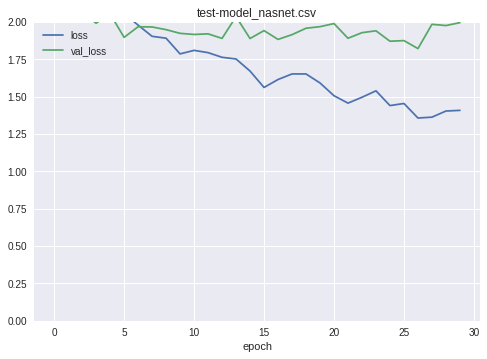

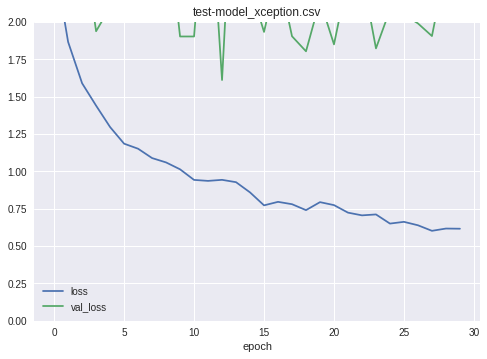

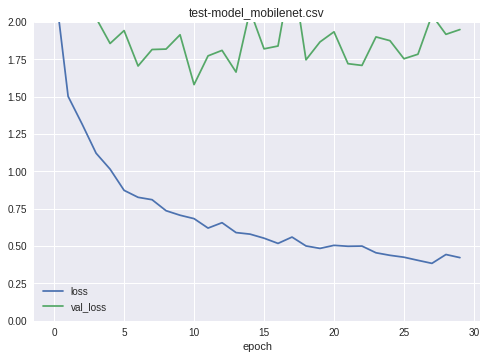

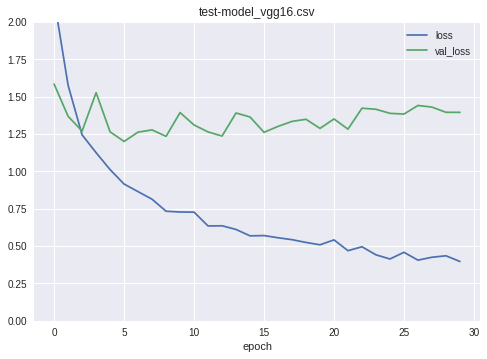

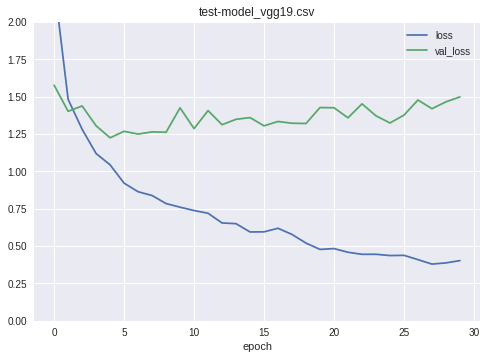

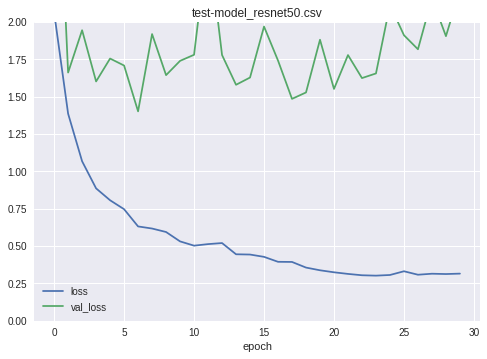

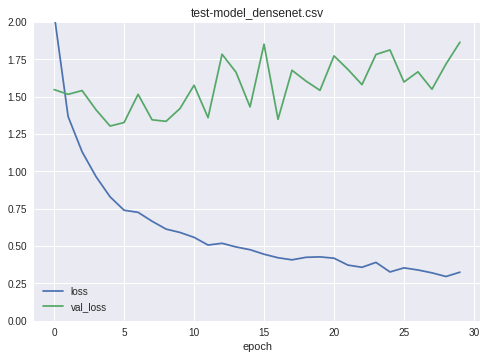

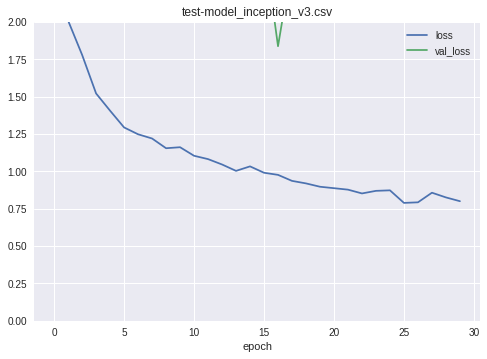

In [0]:
for filename in glob.glob("test-model*.csv"):
  dat = pd.read_csv(filename)
  dat.loc[:, ["epoch", "loss", "val_loss"]].plot(x="epoch", title=filename, ylim=[0, 2])